### **Support Vector Regression (SVR)**


**Import Necessary Libraries**


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load and Explore the Dataset**


In [133]:
data = pd.read_csv("Size_And_Bedrooms_Vs_Price.csv")

In [134]:
data.sample(10)

,Size,Bedrooms,Price
36,1239,3,229900
23,1962,4,259900
35,1437,3,249900
45,1852,4,299900
21,1888,2,255000
14,1268,3,259900
3,1416,2,232000
46,1203,3,239500
8,1380,3,212000
22,1604,3,242900


In [135]:
data.shape

(47, 3)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
Bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
Price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


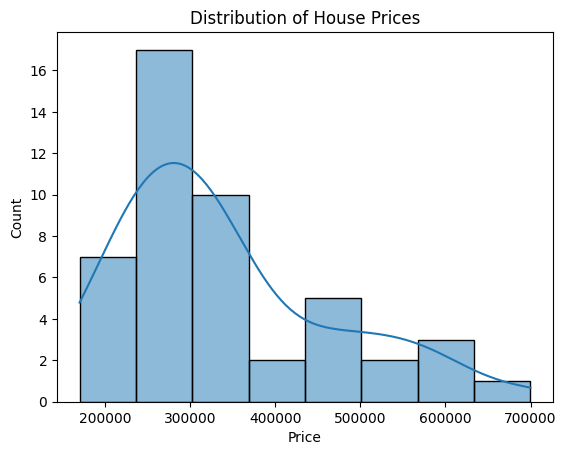

In [138]:
sns.histplot(data=data, x="Price", kde=True)
plt.title("Distribution of House Prices")
plt.show()

**Separate features (X) and target variable (y)**


In [139]:
X = data.drop("Price", axis=1).values
y = data["Price"].values.reshape(-1, 1)

**Feature Scaling**


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

**Train SVR Model**


In [142]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [143]:
svr = SVR()
param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
    "C": [0.1, 1, 5, 10, 50, 100],
}

grid_search_model = GridSearchCV(
    estimator=svr, param_grid=param_grid, scoring="r2", n_jobs=-1, cv=5, verbose=2
)

grid_search_model.fit(X_scaled, y_scaled.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=2)

In [144]:
best_model = grid_search_model.best_estimator_
best_params = grid_search_model.best_params_
best_params

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [145]:
best_model.fit(X_scaled, y_scaled.ravel())

SVR(C=1, kernel='linear')

**Evaluate the Best Model**


In [146]:
r2_score_from_model = best_model.score(X_scaled, y_scaled)
r2_score_from_model

0.7266959078188417

> OR


In [147]:
y_pred_scaled = best_model.predict(X_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

In [148]:
from sklearn.metrics import r2_score

In [149]:
r2_score(y, y_pred)

0.7266959078188417